In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
import numpy as np
import string
import re
import gensim.downloader

In [2]:
#import datasets
train_df = pd.read_csv("Project Data/train.csv")
test_df = pd.read_csv("Project Data/test.csv")

In [3]:
#visualize train data
train_df.tail(10)

,text,label
9533,"Stocks making the biggest moves midday: Tesla,...",2
9534,"Stocks making the biggest moves midday: Tesla,...",2
9535,"Stocks making the biggest moves midday: Uber, ...",2
9536,Stocks making the biggest moves premarket: Tar...,2
9537,Stocks making the biggest moves premarket: TD ...,2
9538,The Week's Gainers and Losers on the Stoxx Eur...,2
9539,Tupperware Brands among consumer gainers; Unil...,2
9540,vTv Therapeutics leads healthcare gainers; Myo...,2
9541,"WORK, XPO, PYX and AMKR among after hour movers",2
9542,"YNDX, I, QD and OESX among tech movers",2


In [4]:
#visualize test data
test_df.head(10)

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."
5,5,Marvell Technology (MRVL) Gains As Market Dips...
6,6,UPDATE 1-Italian airline Alitalia's rescue in ...
7,7,why macro funds are shutting down left and rig...
8,8,Uber's arrival caused binge drinking to increa...
9,9,New Dungeons & Dragons game announced


### Exploratory Analysis 

In [5]:
print(f"Train data columns: {train_df.columns}")
print(f"Test data columns: {test_df.columns}")

Train data columns: Index(['text', 'label'], dtype='object')
Test data columns: Index(['id', 'text'], dtype='object')


In [6]:
train_df['text'].describe()

count                                                  9543
unique                                                 9543
top       $BYND - JPMorgan reels in expectations on Beyo...
freq                                                      1
Name: text, dtype: object

In [7]:
#Verify if any value is null
train_df['text'].isna().sum()

0

In [8]:
#WORD COUNT

#add a new column to tain_df with the number os words
train_df['inicial_word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df

,text,label,inicial_word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10
1,$CCL $RCL - Nomura points to bookings weakness...,0,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10
...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16
9539,Tupperware Brands among consumer gainers; Unil...,2,9
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9


In [9]:
train_df['inicial_word_count'].describe()

count    9543.000000
mean       12.168081
std         4.651245
min         1.000000
25%         9.000000
50%        11.000000
75%        15.000000
max        31.000000
Name: inicial_word_count, dtype: float64

In [10]:
#Analysis of col: word_count
print(f"Train data column word_count MAXIMUM: {train_df['inicial_word_count'].max()}")
print(f"Train data column word_count MINIMUM: {train_df['inicial_word_count'].min()}")
print(f"Train data column word_count MEAN: {train_df['inicial_word_count'].mean()}")
print(f"Train data column word_count MEDIAN: {train_df['inicial_word_count'].median()}")
print(f"Train data column word_count MODE: {train_df['inicial_word_count'].mode()}")
print(f"Train data column word_count SQARE ROOT: {train_df['inicial_word_count'].std()}")
print(f"Train data column word_count UNIQUE: {train_df['inicial_word_count'].unique()}")

Train data column word_count MAXIMUM: 31
Train data column word_count MINIMUM: 1
Train data column word_count MEAN: 12.168081316147962
Train data column word_count MEDIAN: 11.0
Train data column word_count MODE: 0    10
Name: inicial_word_count, dtype: int64
Train data column word_count SQARE ROOT: 4.651245064570518
Train data column word_count UNIQUE: [10 14  7  6 12 11  9  5 16  8 13 20 22 17  4 18 15 19 25 23 21 24 26  1
  2  3 27 29 31]


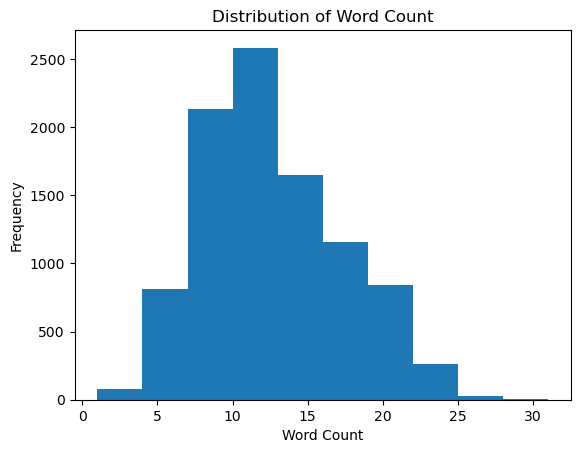

In [11]:
plt.hist(train_df['inicial_word_count'])
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: >

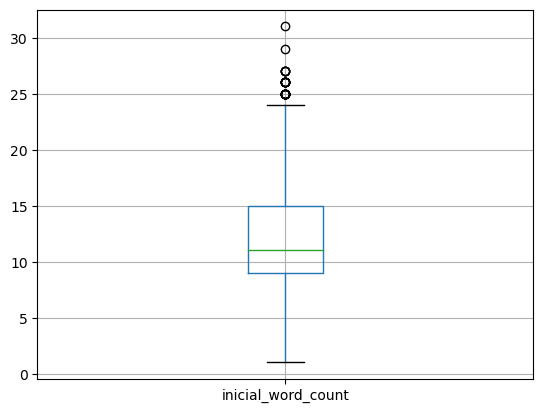

In [12]:
train_df.boxplot('inicial_word_count')
#we are not removing any outlier because every tweet is independent

In [13]:
# Frequency of all words
all_words = ' '.join(train_df['text']).split()
all_words[:10]

['$BYND',
 '-',
 'JPMorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'Beyond',
 'Meat',
 'https://t.co/bd0xbFGjkT']

In [14]:
#Create a DataFrane of all words and their frequencies
wordFreq = pd.Series(all_words).value_counts()

In [15]:
# List of me most common words in all tweets
wordFreq.sort_values(ascending=False)[0:15]

to     2332
the    1820
of     1464
-      1390
in     1361
on     1136
for    1032
a       970
and     898
The     663
at      539
as      528
is      526
by      414
up      388
dtype: int64

In [16]:
wordFreq.index[0:15]

Index(['to', 'the', 'of', '-', 'in', 'on', 'for', 'a', 'and', 'The', 'at',
       'as', 'is', 'by', 'up'],
      dtype='object')

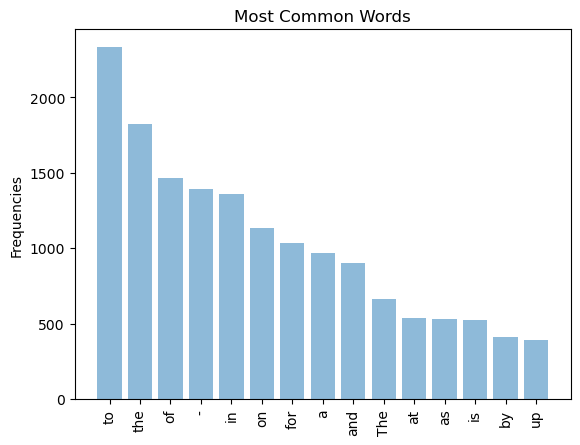

In [17]:
x_labels = wordFreq.index[0:15]
values = wordFreq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(y_pos, x_labels)
plt.ylabel('Frequencies')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.show()

### Data Preprocessing - Exemple 1: Stop Words

In [18]:
#Remove Punctuation
punctuation = list(set(string.punctuation))
punctuation[:5]

["'", '}', '%', '@', '`']

In [19]:
all_words_noPunctuation = [word.lower() for word in all_words if word not in punctuation]
all_words_noPunctuation[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'in',
 'expectations',
 'on',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/bm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

In [22]:
stop = set(stopwords.words('english'))

In [23]:
#creation of variable all_words_clean, this is a text with no punctuations and no stop words
all_words_clean = [word for word in all_words_noPunctuation if word not in stop]
all_words_clean[:10]

['$bynd',
 'jpmorgan',
 'reels',
 'expectations',
 'beyond',
 'meat',
 'https://t.co/bd0xbfgjkt',
 '$ccl',
 '$rcl',
 'nomura']

In [24]:
freq_cleanWords = pd.Series(all_words_clean).value_counts()
freq_cleanWords.sort_values(ascending=False)[0:10] # most frequent word after cleaning

stock              544
new                406
results            352
u.s.               341
says               332
earnings           321
#stock             316
market             296
#marketscreener    285
price              273
dtype: int64

In [25]:
#Compare sentence before remove links
train_df['text'][2]

'$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb'

In [26]:
#Create new column and loop to remove links from data
train_df['text_splited'] = train_df['text'].str.split(' ')
loop_count = 0
for line in train_df['text_splited']:
    for word in line:
        if "http" in word: #remove links
            train_df['text_splited'][loop_count].remove(word)
        elif "$" in word: #remove stock ticker
            train_df['text_splited'][loop_count].remove(word)
        else:
            continue
    loop_count += 1    
print(train_df['text_splited'][2])

['-', 'Cemex', 'cut', 'at', 'Credit', 'Suisse,', 'J.P.', 'Morgan', 'on', 'weak', 'building', 'outlook']


In [27]:
#join all word again
train_df['text_splited'] = train_df['text_splited'].str.join(' ')

In [28]:
train_df['text_splited']

0         - JPMorgan reels in expectations on Beyond Meat
1       $RCL - Nomura points to bookings weakness at C...
2       - Cemex cut at Credit Suisse, J.P. Morgan on w...
3                           BTIG Research cuts to Neutral
4               - Funko slides after Piper Jaffray PT cut
                              ...                        
9538    The Week's Gainers and Losers on the Stoxx Eur...
9539    Tupperware Brands among consumer gainers; Unil...
9540    vTv Therapeutics leads healthcare gainers; Myo...
9541      WORK, XPO, PYX and AMKR among after hour movers
9542               YNDX, I, QD and OESX among tech movers
Name: text_splited, Length: 9543, dtype: object

In [29]:
train_df.rename(columns={'text': 'text_backup'}, inplace=True)
train_df.rename(columns={'text_splited': 'text'}, inplace=True)
train_df.columns

Index(['text_backup', 'label', 'inicial_word_count', 'text'], dtype='object')

In [31]:
#add a new column to tain_df with the number os words
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split(" ")))
type(train_df['text'][0])

str

### Data Preprocessing - Exemple 2: Stemming and Lemmatization

In [32]:
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [33]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/bm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/bm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
stemmer = SnowballStemmer('english')

In [36]:
lemma = WordNetLemmatizer()

In [37]:
#Apply preprocessing steps
from tqdm import tqdm
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [38]:
cleaned_text = clean(train_df['text'], lemmatize = True, stemmer = False)

100%|█████████████████████████████████████| 9543/9543 [00:01<00:00, 5341.65it/s]


In [39]:
# Compare text before and after cleaning
train_df['text'][:5] #before cleaning

0      - JPMorgan reels in expectations on Beyond Meat
1    $RCL - Nomura points to bookings weakness at C...
2    - Cemex cut at Credit Suisse, J.P. Morgan on w...
3                        BTIG Research cuts to Neutral
4            - Funko slides after Piper Jaffray PT cut
Name: text, dtype: object

In [40]:
cleaned_text[:5]

['jpmorgan reel expectation beyond meat',
 'rcl nomura point booking weakness carnival royal caribbean',
 'cemex cut credit suisse j p morgan weak building outlook',
 'btig research cut neutral',
 'funko slide piper jaffray pt cut']

In [42]:
#create a function to update a dataFrame
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [44]:
train_df['Cleaned Text'] = cleaned_text
train_df

,text_backup,label,inicial_word_count,text,word_count,Cleaned Text
0,$BYND - JPMorgan reels in expectations on Beyo...,0,10,- JPMorgan reels in expectations on Beyond Meat,8,jpmorgan reel expectation beyond meat
1,$CCL $RCL - Nomura points to bookings weakness...,0,14,$RCL - Nomura points to bookings weakness at C...,12,rcl nomura point booking weakness carnival roy...
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0,14,"- Cemex cut at Credit Suisse, J.P. Morgan on w...",12,cemex cut credit suisse j p morgan weak buildi...
3,$ESS: BTIG Research cuts to Neutral https://t....,0,7,BTIG Research cuts to Neutral,5,btig research cut neutral
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0,10,- Funko slides after Piper Jaffray PT cut,8,funko slide piper jaffray pt cut
...,...,...,...,...,...,...
9538,The Week's Gainers and Losers on the Stoxx Eur...,2,16,The Week's Gainers and Losers on the Stoxx Eur...,15,week gainer loser stoxx europe dec economy mar...
9539,Tupperware Brands among consumer gainers; Unil...,2,9,Tupperware Brands among consumer gainers; Unil...,9,tupperware ands among consumer gainer unilever...
9540,vTv Therapeutics leads healthcare gainers; Myo...,2,11,vTv Therapeutics leads healthcare gainers; Myo...,11,vtv therapeutic lead healthcare gainer myomo b...
9541,"WORK, XPO, PYX and AMKR among after hour movers",2,9,"WORK, XPO, PYX and AMKR among after hour movers",9,work xpo pyx amkr among hour mover


### Apply Bag of Words

In [45]:
bow = CountVectorizer(binary=True)

In [46]:
# define our X variable
X = bow.fit_transform(train_df['Cleaned Text'])
X

<9543x13627 sparse matrix of type '<class 'numpy.int64'>'
	with 76156 stored elements in Compressed Sparse Row format>

In [47]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
test_df['Cleaned Text'] = clean(test_df['text'], lemmatize = True, stemmer = False)

100%|████████████████████████████████████| 2388/2388 [00:00<00:00, 12591.17it/s]


In [49]:
#Define our target (Y)
y = train_df['label']

In [50]:
#Train with KNN model
knn_model = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance').fit(X,y)

In [51]:
#Apply BOW
test = bow.transform(test_df['text'])

In [52]:
#Apply KNN to make predictions on test data
predict = knn_model.predict(test)

In [56]:
for review, score in zip(test_df['Cleaned Text'], predict):
    print(f'The predicted score for the review: "{review}", is {score}.')
    print("=_"*20)

The predicted score for the review: "etf asset surge tenfold year trillion bank america predicts", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "hedge fund think evolution petroleum corporation epm", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "pvh phillips van heusen q earnings preview http co knhcywvnbx", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "china process waiving retaliatory tariff import u pork soy domestic company pro http co mzu trbx", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "highlight growth scarce investor seem willing pay growth stock pncbank http co ro fbokbg", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "marvell technology mrvl gain market dip know nasdaq", is 2.
=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_=_
The predicted score for the review: "update italian airline alitalia re

In [57]:
#é preciso correr o ponto 5.5 Predict for Test corpus??
#
#

In [58]:
test_df['label'] = predict

In [207]:
X_test = bow.transform(test_df['Cleaned Text'])
y_test = np.array(test_df['label'])

In [60]:
y_pred = knn_model.predict(X_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

### Evaluate

In [61]:
labels = {'Bearish': 0, 'Bullish':1, 'Neutral':2}

In [63]:
#analyse the results of the test data
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.70      0.62      0.66       183
     Bullish       0.68      0.73      0.71       461
     Neutral       0.92      0.91      0.92      1744

    accuracy                           0.86      2388
   macro avg       0.77      0.76      0.76      2388
weighted avg       0.86      0.86      0.86      2388



In [65]:
confusion_matrix(y_pred, y_test)

array([[ 114,   32,   37],
       [  21,  336,  104],
       [  28,  123, 1593]])

/tmp/ipykernel_7715/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


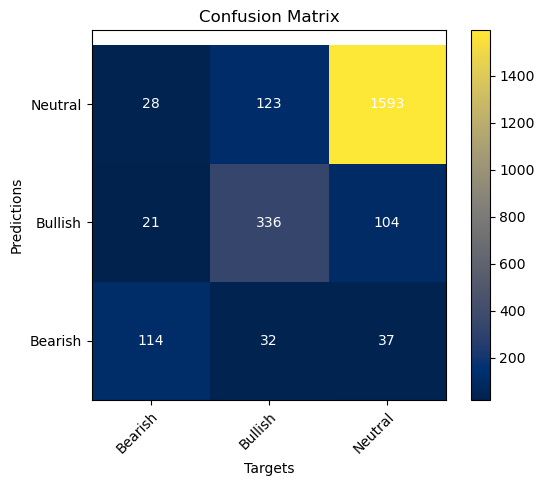

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_test), labels.keys())

### TF-IDF

In [136]:
tfidf = TfidfVectorizer(ngram_range=(1,1)) # we tried with several ngram_range and the best result is with(1,1)

In [137]:
X2 = tfidf.fit_transform(train_df['Cleaned Text'])
X2

<9543x13627 sparse matrix of type '<class 'numpy.float64'>'
	with 76156 stored elements in Compressed Sparse Row format>

In [138]:
y_tt = train_df['label']

In [139]:
df_tfidf = pd.DataFrame(X2[0].T.todense(), index=tfidf.get_feature_names_out(), columns=['TF-IDF'])
df_tfidf

,TF-IDF
aa,0.0
aaa,0.0
aaham,0.0
aal,0.0
aams,0.0
...,...
zxjv,0.0
zyen,0.0
zynex,0.0
zynga,0.0


In [140]:
df_tfidf = df_tfidf.sort_values('TF-IDF', ascending=False)
df_tfidf.head(20)

,TF-IDF
reel,0.518196
meat,0.451645
beyond,0.437325
jpmorgan,0.428444
expectation,0.390733
pi,0.000000
photo,0.000000
photograph,0.000000
photographer,0.000000
phr,0.000000


In [141]:
knn_model_tfidf = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance').fit(X2,y_tt)

In [142]:
X_test2 = tfidf.transform(test_df['Cleaned Text'])
y_test2 = np.array(test_df['label'])

In [143]:
y_pred2 = knn_model_tfidf.predict(X_test2)
y_pred2[:5]

array([2, 2, 2, 1, 2])

In [144]:
print(classification_report(y_pred2, y_test2, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.64      0.50      0.56       208
     Bullish       0.61      0.69      0.65       429
     Neutral       0.90      0.89      0.90      1751

    accuracy                           0.82      2388
   macro avg       0.72      0.70      0.70      2388
weighted avg       0.83      0.82      0.82      2388



In [145]:
confusion_matrix(y_pred2, y_test2)

array([[ 104,   52,   52],
       [  16,  298,  115],
       [  43,  141, 1567]])

/tmp/ipykernel_7715/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


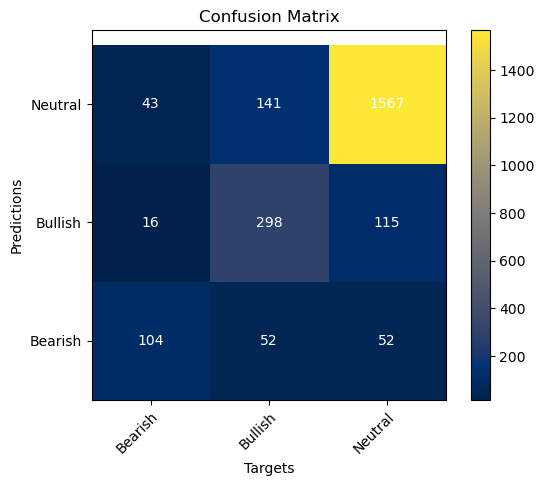

In [146]:
plot_cm(confusion_matrix(y_pred2, y_test2), labels.keys())

### Apply MLP model

In [156]:
mlp = MLPClassifier(solver='adam', hidden_layer_sizes=(3,3), activation='logistic', random_state=5).fit(X,y)
#We tried with different hidden layers and our best model is (3,3)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [157]:
mlp_prediction = mlp.predict(X_test)
mlp_prediction[:5]

array([2, 2, 2, 1, 2])

In [158]:
print(classification_report(y_test, mlp_prediction, target_names=labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.18      0.17      0.17       163
     Bullish       0.49      0.55      0.52       491
     Neutral       0.85      0.82      0.83      1734

    accuracy                           0.72      2388
   macro avg       0.50      0.51      0.51      2388
weighted avg       0.73      0.72      0.72      2388



### Model LSTM

In [159]:
import tensorflow as tf
import tensorflow.keras as keras
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
#make the model start with same weights
tf.random.set_seed(221)
#import packages
from keras.models import Model
from keras.layers import Input, LSTM, Dense, TimeDistributed, Bidirectional, Masking
from keras import layers
import tensorflow as tf
import tensorflow.keras as keras
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
from keras_preprocessing.sequence import pad_sequences

2023-04-01 19:34:54.713576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 19:34:56.997494: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-01 19:34:56.998925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 19:35:02.672063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [162]:
print(list(gensim.downloader.info()['models'].keys()))
#since we are dealing with tweets we choose 'glove-twitter-25'

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [235]:
#word_to_vec = gensim.downloader.load('glove-twitter-25')
word_to_vec = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [237]:
emb_size = 50

In [238]:
#function to get embeddings for each word based on word_to_vec list
def corpus2vec(corpus):
    corpus_vec = []
    for document in tqdm(corpus):
        #get word vectors for each document
        doc_vectors = []
        for word in document.split():
            if word in word_to_vec.index_to_key:
                doc_vectors.append(word_to_vec.word_vec(word))         
        corpus_vec.append(doc_vectors)
    return corpus_vec

In [239]:
x_train_vec = corpus2vec(train_df['Cleaned Text'])

  0%|                                                  | 0/9543 [00:00<?, ?it/s]/tmp/ipykernel_7715/2857742778.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(word_to_vec.word_vec(word))
100%|███████████████████████████████████████| 9543/9543 [02:31<00:00, 62.81it/s]


In [240]:
x_test_vec = corpus2vec(test_df['Cleaned Text'])

  0%|                                                  | 0/2388 [00:00<?, ?it/s]/tmp/ipykernel_7715/2857742778.py:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  doc_vectors.append(word_to_vec.word_vec(word))
100%|███████████████████████████████████████| 2388/2388 [01:06<00:00, 35.75it/s]


In [241]:
#get list with lenghts of sentences
train_len = []
for i in x_train_vec:
    train_len.append(len(i))
print(train_len[:10], end=" ")

[5, 8, 10, 3, 6, 6, 3, 4, 4, 5] 

In [242]:
max(train_len)

24

In [243]:
#make all sentences the same size - model input must be of the same size

#X_pad = pad_sequences(maxlen=max(train_len),sequences=x_train_vec, padding="post", dtype='float64') #tried with this size but I got erros fiting the model
X_pad = pad_sequences(maxlen=29,sequences=x_train_vec, padding="post", dtype='float64')

In [244]:
X_pad[0][18:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [245]:
#turn input into a tensor (another sort of array) for the model
X_tf = tf.convert_to_tensor(X_pad, dtype='float32')
X_tf.shape

TensorShape([9543, 29, 50])

In [246]:
#Most turn output into one hot encoded matrix
y_tf = tf.one_hot(y, depth=3)

In [247]:
'''model input in the shape(number of words per doc, word embedding size)'''
input_ = Input(shape=(max(train_df['word_count']), emb_size))
 
'''mask layer to avoid model from considering padding vectors'''
mask_layer = Masking(mask_value=0)
mask = mask_layer(input_)

'''BiLSTM layer'''
lstm = Bidirectional(LSTM(units=4))(mask)

'''activation layer'''
act = Dense(3, activation='softmax')(lstm)

'''model input and output'''
model = Model(input_, act)

'''model loss function and evaluation metrics'''
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 29, 50)]          0         
                                                                 
 masking_2 (Masking)         (None, 29, 50)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 8)                1760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 1,787
Trainable params: 1,787
Non-trainable params: 0
_________________________________________________________________


In [248]:
history = model.fit(X_tf, y_tf, batch_size=31, epochs=10, verbose=1, validation_split=0.20)
#some times we kernel reset it gives an error because of the shape size. We had to change shape size first to 31, than to 29
#we tried to improve our model. First we try batch_size=31 and after we raise the number to 50

Epoch 1/10
247/247 [==============================] - 145s 586ms/step - loss: 0.8160 - accuracy: 0.6894 - val_loss: 1.1615 - val_accuracy: 0.4688
Epoch 2/10
247/247 [==============================] - 140s 568ms/step - loss: 0.7309 - accuracy: 0.7061 - val_loss: 1.1578 - val_accuracy: 0.4788
Epoch 3/10
247/247 [==============================] - 155s 630ms/step - loss: 0.6838 - accuracy: 0.7231 - val_loss: 1.1114 - val_accuracy: 0.5008
Epoch 4/10
247/247 [==============================] - 145s 587ms/step - loss: 0.6555 - accuracy: 0.7402 - val_loss: 1.1228 - val_accuracy: 0.5118
Epoch 5/10
247/247 [==============================] - 155s 630ms/step - loss: 0.6341 - accuracy: 0.7467 - val_loss: 1.0781 - val_accuracy: 0.5228
Epoch 6/10
247/247 [==============================] - 148s 598ms/step - loss: 0.6188 - accuracy: 0.7543 - val_loss: 1.0994 - val_accuracy: 0.5327
Epoch 7/10
247/247 [==============================] - 146s 591ms/step - loss: 0.6047 - accuracy: 0.7562 - val_loss: 1.1361 -

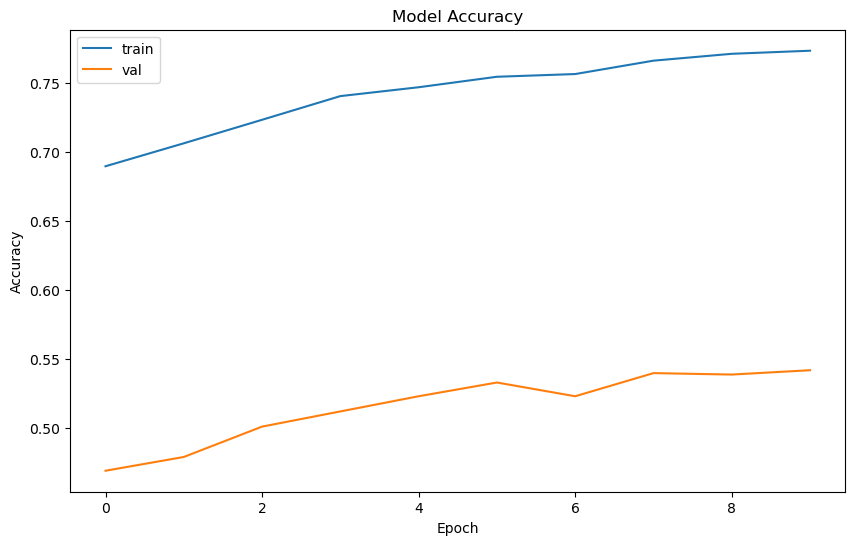

In [249]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [250]:
X_test_pad = pad_sequences(maxlen=29,sequences=x_test_vec, padding="post", dtype='float64')

In [251]:
#x_test = np.expand_dims(x_test,-1)
x_test = tf.convert_to_tensor(X_test_pad, dtype='float32')

In [252]:
x_test.shape

TensorShape([2388, 29, 50])

In [253]:
pred_y = model.predict(x_test)

75/75 [==============================] - 13s 166ms/step


In [254]:
pred_y[0:10]

array([[0.35060617, 0.46576005, 0.18363385],
       [0.03032746, 0.03019493, 0.9394776 ],
       [0.03735135, 0.20949668, 0.75315195],
       [0.11151499, 0.03281873, 0.8556663 ],
       [0.24235205, 0.62634504, 0.13130304],
       [0.07765911, 0.6348113 , 0.28752968],
       [0.07380529, 0.0159351 , 0.9102596 ],
       [0.11260654, 0.04039107, 0.8470023 ],
       [0.25333643, 0.08144706, 0.6652165 ],
       [0.00822924, 0.06112836, 0.9306424 ]], dtype=float32)

In [255]:
y_pred = []
for doc in pred_y:
    y_pred.append(np.argmax(doc, axis=None, out=None))

In [256]:
y_pred[0:10]

[1, 2, 2, 2, 1, 1, 2, 2, 2, 2]

In [257]:
y_test[0:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2])

In [258]:
#y_test = tf.one_hot(y_test, depth=2)

In [259]:
print(classification_report(y_test, y_pred, target_names = labels.keys()))

              precision    recall  f1-score   support

     Bearish       0.20      0.22      0.21       163
     Bullish       0.56      0.36      0.44       491
     Neutral       0.81      0.89      0.85      1734

    accuracy                           0.73      2388
   macro avg       0.52      0.49      0.50      2388
weighted avg       0.72      0.73      0.72      2388

